In [41]:
import os
import shutil
from google.colab import files

!rm -r demo/*
Selected_CNN = 'Improved CNN' #@param ["Basic CNN", "Improved CNN"]
input_dir = "demo/sample_test"
os.makedirs(input_dir, exist_ok=True)
uploaded = files.upload()
for filename in uploaded.keys():
  input_path = os.path.join(input_dir, filename)
  shutil.move(filename, input_path)

Saving 10010.png to 10010.png


Improved CNN model is selected


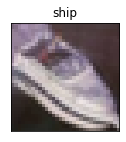

In [42]:
from keras.preprocessing import image
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


def class_prediction():
	# Image loading directory
	load_file = 'demo/sample_test/' + filename

	# Loading the image and convert to array
	img = image.img_to_array(image.load_img(load_file, target_size=(32,32)))
 
	# Reshping into a single sample and preparing pixel data
	img = (img.reshape(1, 32, 32, 3)).astype('float32')
	img = img / 255.

	# Switch to selected model
	if (Selected_CNN == 'Improved CNN'):
		print("Improved CNN model is selected")
		model = load_model('drive/MyDrive/3014397_ITNPAI1/data_augmentation_dropout_batch_normalization_final_model.h5')
	else:
		print("Basic CNN model is selected")
		model = load_model('drive/MyDrive/3014397_ITNPAI1/CNN_VGG.h5')
 
	# predict the class
	plt.figure(figsize=(5,2))
	result = model.predict(img)
	class_num = np.argmax(result,axis=1)
	plt.subplot(1,2,1)
	plt.xticks([])
	plt.yticks([])
	plt.imshow(img.reshape(32,32, 3))
	plt.title(class_names[int(class_num)], fontsize=12)
 
 
class_prediction()